Checking and installing required packages...
✓ pandas is already installed
✓ numpy is already installed
✓ matplotlib is already installed
✓ seaborn is already installed
✓ nltk is already installed
✓ vaderSentiment is already installed
textblob not installed. Installing...
✓ textblob installed successfully
✓ scikit-learn is already installed
emoji not installed. Installing...
✓ emoji installed successfully
wordcloud not installed. Installing...
✓ wordcloud installed successfully
✓ spacy is already installed


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Setting up NLTK dependencies...
✓ Downloaded vader_lexicon
✓ Downloaded punkt
✓ Downloaded stopwords
Loading spaCy model...
✓ Loaded spaCy model
Setting up WordCloud...
✓ Loaded WordCloud
                          SENTIMENT ANALYSIS PIPELINE                           

STEP 1: DATASET LOADING
--------------------------------------------------------------------------------
Please enter the path to your dataset (CSV format): /content/df_dataset.csv
Loading dataset from /content/df_dataset.csv...
✓ Dataset loaded successfully with shape: (127987, 17)

Preview of the data:
   unnamed:_0     airline            reviewer_names review_date   month_flown  \
0           0  air-canada  Daniele Ferreira Martins  2025-04-10    March 2025   
1           1  air-canada            John Attersley  2025-03-06    March 2025   
2           2  air-canada              Hicham Alame  2025-02-24  January 2025   

                                         review_text type_of_traveller  \
0  ✅ Trip Verified |   Ai

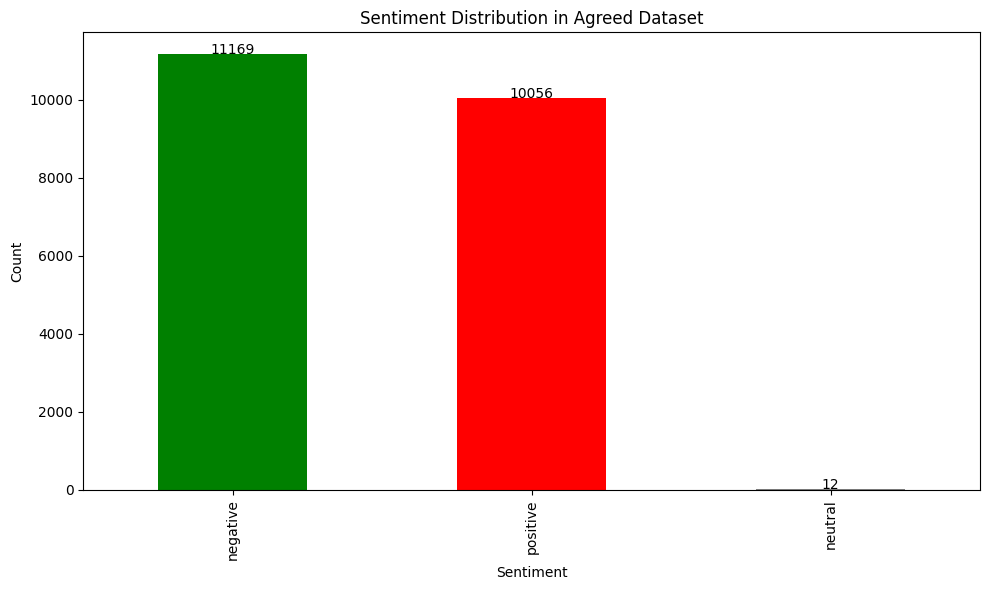


STEP 5: TEXT PREPROCESSING
--------------------------------------------------------------------------------
Preprocessing text for agreed dataset...

Starting text preprocessing...
Calculating text metrics...
Creating clean text column...
Converting emojis...
Detecting verified trips...
Converting to lowercase...
Converting chat words...
Removing punctuation...
Tokenizing text...
Removing stopwords...
Applying stemming...
Joining tokens back to text...
✓ Text preprocessing complete
Preprocessing text for full dataset...

Starting text preprocessing...
Calculating text metrics...
Creating clean text column...
Converting emojis...
Detecting verified trips...
Converting to lowercase...
Converting chat words...
Removing punctuation...
Tokenizing text...
Removing stopwords...
Applying stemming...
Joining tokens back to text...
✓ Text preprocessing complete

STEP 6: WORDCLOUD VISUALIZATION
--------------------------------------------------------------------------------
Generating wordclouds

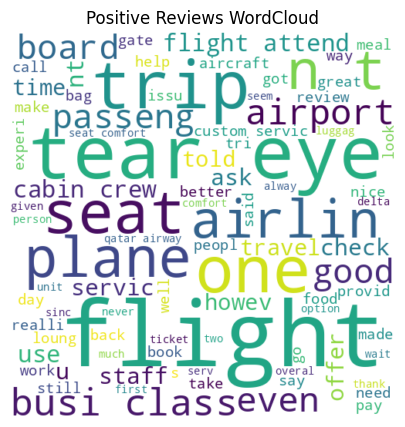

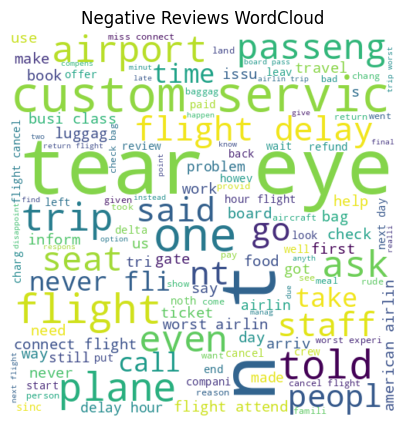

✓ Wordclouds generated

STEP 7: COMMON WORDS ANALYSIS
--------------------------------------------------------------------------------
Analyzing common words in the agreed dataset...

Analyzing most common words...


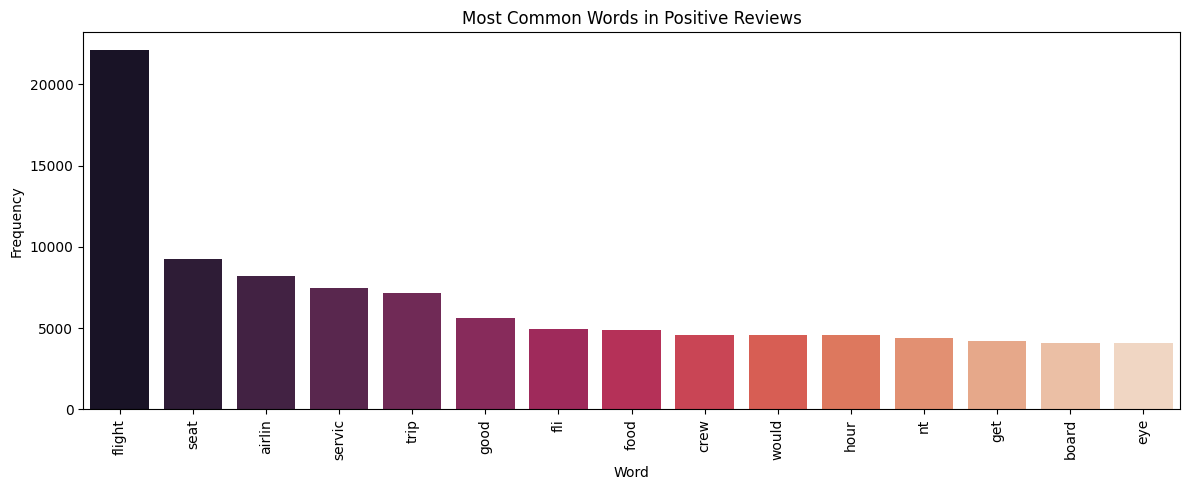

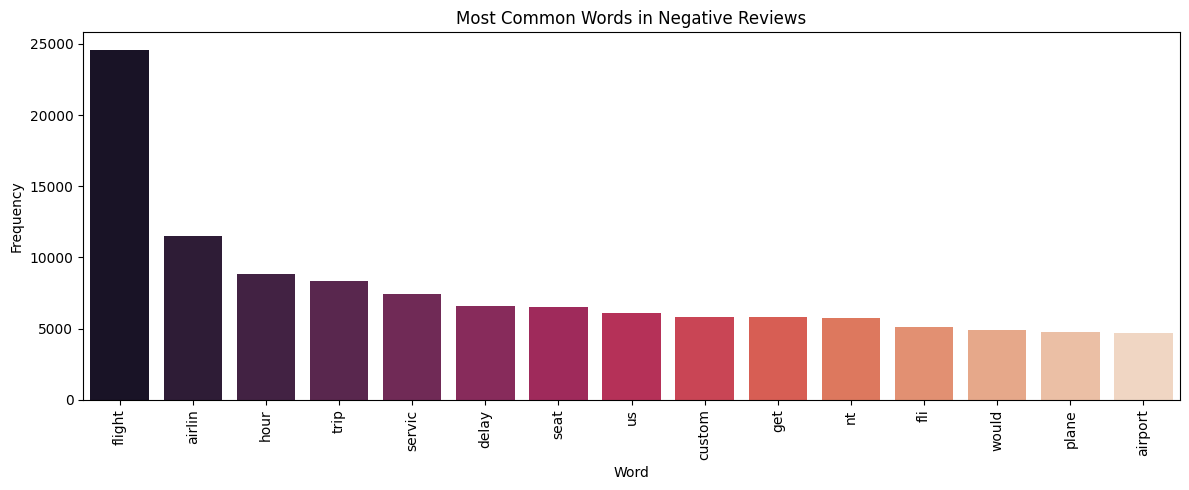

✓ Common words analysis complete

STEP 8: PREPARING ML DATA
--------------------------------------------------------------------------------

Preparing data for machine learning...
Using agreed dataset with 21237 records

Defining sample sizes for ML training:
Available positive samples: 10056
Available negative samples: 11169
Available neutral samples: 12

Enter positive sample size (max 10056, press Enter for all): 10000
Enter negative sample size (max 11169, press Enter for all): 10000

Sample sizes defined: 10000 positive, 10000 negative
✓ Prepared dataset with 20000 records

STEP 9: MODEL TRAINING
--------------------------------------------------------------------------------

Training sentiment analysis model...
Training logistic regression model...

Model Accuracy: 0.9237

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1981
           1       0.96      0.89      0.92      2019

    accuracy         

In [ ]:
import warnings
import sys
import subprocess
import importlib

# Function to check and install required packages
def check_and_install_package(package_name, import_name=None):
    """Check if a package is installed, and install it if not."""
    if import_name is None:
        import_name = package_name

    try:
        importlib.import_module(import_name)
        print(f"✓ {package_name} is already installed")
    except ImportError:
        print(f"{package_name} not installed. Installing...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])
        print(f"✓ {package_name} installed successfully")

# Check and install required packages
required_packages = [
    ('pandas', 'pandas'),
    ('numpy', 'numpy'),
    ('matplotlib', 'matplotlib'),
    ('seaborn', 'seaborn'),
    ('nltk', 'nltk'),
    ('vaderSentiment', 'nltk.sentiment.vader'),
    ('textblob', 'textblob'),
    ('scikit-learn', 'sklearn'),
    ('emoji', 'emoji'),
    ('wordcloud', 'wordcloud'),
    ('spacy', 'spacy')
]

print("Checking and installing required packages...")
for package, import_name in required_packages:
    check_and_install_package(package, import_name)

# Now import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import re
import string
import warnings
from collections import Counter
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import emoji
warnings.filterwarnings('ignore')

# Download the 'punkt_tab' data package
nltk.download('punkt_tab')

class SentimentAnalysisPipeline:
    def __init__(self):
        # Initialize dependencies
        self.download_nltk_dependencies()
        self.load_spacy()
        self.load_wordcloud()
        self.chat_words = self.get_chat_words_dict()

    def download_nltk_dependencies(self):
        """Download required NLTK packages"""
        print("Setting up NLTK dependencies...")
        for package in ['vader_lexicon', 'punkt', 'stopwords']:
            try:
                nltk.download(package, quiet=True)
                print(f"✓ Downloaded {package}")
            except Exception as e:
                print(f"Failed to download {package}: {e}")

    def load_spacy(self):
        """Load spaCy model"""
        print("Loading spaCy model...")
        try:
            import spacy
            try:
                self.nlp = spacy.load('en_core_web_sm')
                print("✓ Loaded spaCy model")
            except OSError:
                print("spaCy model 'en_core_web_sm' not found. Downloading...")
                subprocess.check_call([sys.executable, "-m", "spacy", "download", "en_core_web_sm"])
                self.nlp = spacy.load('en_core_web_sm')
                print("✓ Downloaded and loaded spaCy model")
        except Exception as e:
            print(f"Failed to load spaCy: {e}")
            self.nlp = None

    def load_wordcloud(self):
        """Load WordCloud module"""
        print("Setting up WordCloud...")
        try:
            from wordcloud import WordCloud
            self.WordCloud = WordCloud
            print("✓ Loaded WordCloud")
        except Exception as e:
            print(f"Failed to load WordCloud: {e}")
            self.WordCloud = None

    def get_chat_words_dict(self):
        """Define chat words dictionary for preprocessing"""
        chat_words = {
            "AFAIK": "As Far As I Know",
            "AFK": "Away From Keyboard",
            "ASAP": "As Soon As Possible",
            "ATK": "At The Keyboard",
            "ATM": "At The Moment",
            "A3": "Anytime, Anywhere, Anyplace",
            "BAK": "Back At Keyboard",
            "BBL": "Be Back Later",
            "BBS": "Be Back Soon",
            "BF": "Boy Friend",
            "BFN": "Bye For Now",
            "B4N": "Bye For Now",
            "BRB": "Be Right Back",
            "BRT": "Be Right There",
            "BTW": "By The Way",
            "B4": "Before",
            "CU": "See You",
            "CUL8R": "See You Later",
            "CYA": "See You",
            "FAQ": "Frequently Asked Questions",
            "FC": "Fingers Crossed",
            "FWIW": "For What It's Worth",
            "FYI": "For Your Information",
            "GAL": "Get A Life",
            "GG": "Good Game",
            "GN": "Good Night",
            "GMTA": "Great Minds Think Alike",
            "GR8": "Great!",
            "G9": "Genius",
            "IC": "I See",
            "ICQ": "I Seek you (also a chat program)",
            "ILU": "I Love You",
            "IMHO": "In My Honest/Humble Opinion",
            "IMO": "In My Opinion",
            "IOW": "In Other Words",
            "IRL": "In Real Life",
            "KISS": "Keep It Simple, Stupid",
            "LDR": "Long Distance Relationship",
            "LMAO": "Laugh My A.. Off",
            "LOL": "Laughing Out Loud",
            "lol": "Laughing Out Loud",
            "LTNS": "Long Time No See",
            "L8R": "Later",
            "MTE": "My Thoughts Exactly",
            "M8": "Mate",
            "4MY": "For My",
            "NRN": "No Reply Necessary",
            "OIC": "Oh I See",
            "PITA": "Pain In The A..",
            "PRT": "Party",
            "PRW": "Parents Are Watching",
            "QPSA?": "Que Pasa?",
            "R": "Are",
            "ROFL": "Rolling On The Floor Laughing",
            "ROFLOL": "Rolling On The Floor Laughing Out Loud",
            "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
            "SK8": "Skate",
            "STATS": "Your sex and age",
            "ASL": "Age, Sex, Location",
            "THX": "Thank You",
            "TTFN": "Ta-Ta For Now!",
            "TTYL": "Talk To You Later",
            "U": "You",
            "U2": "You Too",
            "U4E": "Yours For Ever",
            "WB": "Welcome Back",
            "WTF": "What The F...",
            "WTG": "Way To Go!",
            "WUF": "Where Are You From?",
            "W8": "Wait...",
            "7K": "Sick:-D Laugher",
            "TFW": "That feeling when. TFW internet slang often goes in a caption to an image.",
            "MFW": "My face when",
            "MRW": "My reaction when",
            "IFYP": "I feel your pain",
            "TNTL": "Trying not to laugh",
            "JK": "Just kidding",
            "IDC": "I don't care",
            "ILY": "I love you",
            "IMU": "I miss you",
            "ADIH": "Another day in hell",
            "ZZZ": "Sleeping, bored, tired",
            "WYWH": "Wish you were here",
            "TIME": "Tears in my eyes",
            "BAE": "Before anyone else",
            "FIMH": "Forever in my heart",
            "BSAAW": "Big smile and a wink",
            "BWL": "Bursting with laughter",
            "BFF": "Best friends forever",
            "CSL": "Can't stop laughing"
        }
        return chat_words

    def load_dataset(self):
        """Load dataset from user input path"""
        while True:
            try:
                file_path = input("Please enter the path to your dataset (CSV format): ")
                if file_path.strip() == "":
                    print("Using default path: 'df_dataset.csv'")
                    file_path = 'df_dataset.csv'

                # Load the dataset
                print(f"Loading dataset from {file_path}...")
                df = pd.read_csv(file_path)
                print(f"✓ Dataset loaded successfully with shape: {df.shape}")

                # Format column names
                df.columns = df.columns.str.lower()
                df.columns = df.columns.str.replace(' ', '_')

                # Display the first few rows
                print("\nPreview of the data:")
                print(df.head(3))

                return df
            except FileNotFoundError:
                print(f"File not found at {file_path}. Please check the path and try again.")
            except Exception as e:
                print(f"Error loading dataset: {e}. Please try again.")

    def identify_text_column(self, df):
        """Identify potential text columns for sentiment analysis"""
        # List columns with string/object data type and more than 20 unique values
        text_columns = []

        for col in df.columns:
            if df[col].dtype == 'object':
                unique_values = df[col].nunique()
                avg_length = df[col].astype(str).str.len().mean()

                if unique_values > 20 and avg_length > 30:
                    text_columns.append((col, unique_values, avg_length))

        if not text_columns:
            print("No suitable text columns found for sentiment analysis.")
            return self.select_column_manually(df)

        # Sort by likelihood (average text length)
        text_columns.sort(key=lambda x: x[2], reverse=True)

        print("\nPotential text columns for sentiment analysis:")
        for i, (col, unique, avg_len) in enumerate(text_columns, 1):
            print(f"{i}. {col} (unique values: {unique}, avg length: {avg_len:.1f})")

        # Suggest the most likely column
        suggested_column = text_columns[0][0]

        return self.verify_text_column(df, suggested_column, [col[0] for col in text_columns])

    def select_column_manually(self, df):
        """Let user manually select a column if automatic detection fails"""
        print("\nAll available columns:")
        for i, col in enumerate(df.columns, 1):
            print(f"{i}. {col}")

        while True:
            try:
                selection = int(input("\nSelect a column number for sentiment analysis: "))
                if 1 <= selection <= len(df.columns):
                    selected_column = df.columns[selection-1]
                    return selected_column
                else:
                    print(f"Please enter a number between 1 and {len(df.columns)}")
            except ValueError:
                print("Please enter a valid number")

    def verify_text_column(self, df, suggested_column, text_columns):
        """Verify the selected text column with the user"""
        print(f"\nSuggested column for sentiment analysis: '{suggested_column}'")
        print("\nSample text from this column:")

        # Show a sample from the suggested column
        for i in range(min(3, len(df))):
            text = df[suggested_column].iloc[i]
            if isinstance(text, str) and len(text) > 100:
                print(f"Sample {i+1}: {text[:100]}...")
            else:
                print(f"Sample {i+1}: {text}")

        verification = input("\nDo you want to use this column for sentiment analysis? (yes/no): ").lower()

        if verification in ['yes', 'y']:
            return suggested_column
        else:
            print("\nPlease select another column:")
            for i, col in enumerate(text_columns, 1):
                print(f"{i}. {col}")

            print(f"{len(text_columns) + 1}. Select from all columns")

            while True:
                try:
                    selection = int(input("\nEnter column number: "))
                    if 1 <= selection <= len(text_columns):
                        return text_columns[selection-1]
                    elif selection == len(text_columns) + 1:
                        return self.select_column_manually(df)
                    else:
                        print(f"Please enter a number between 1 and {len(text_columns) + 1}")
                except ValueError:
                    print("Please enter a valid number")

    def clean_data(self, df):
        """Clean the dataset by removing rows with missing values"""
        print("\nChecking for missing values...")
        na_counts = df.isna().sum()

        # Print columns with missing values
        columns_with_na = na_counts[na_counts > 0]
        if not columns_with_na.empty:
            print("Columns with missing values:")
            for col, count in columns_with_na.items():
                print(f"- {col}: {count} missing values")

            print(f"\nRemoving {len(df) - len(df.dropna())} rows with missing values...")
            df = df.dropna()
            print(f"✓ Clean dataset shape: {df.shape}")
        else:
            print("✓ No missing values found")

        return df

    def textblob_sentiment(self, text):
        """Apply TextBlob sentiment analysis"""
        analysis = TextBlob(str(text))
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity < 0:
            return 'negative'
        else:
            return 'neutral'

    def vader_sentiment(self, text):
        """Apply VADER sentiment analysis"""
        sid = SentimentIntensityAnalyzer()
        scores = sid.polarity_scores(str(text))
        compound = scores['compound']

        if compound > 0.05:
            return 'positive'
        elif compound < -0.05:
            return 'negative'
        else:
            return 'neutral'

    def get_sentiment_scores(self, text):
        """Get sentiment scores from TextBlob"""
        return TextBlob(str(text)).sentiment.polarity

    def get_vader_scores(self, text):
        """Get compound sentiment scores from VADER"""
        sid = SentimentIntensityAnalyzer()
        return sid.polarity_scores(str(text))['compound']

    def apply_sentiment_analysis(self, df, text_column):
        """Apply sentiment analysis to the text column"""
        print("\nApplying sentiment analysis...")

        # TextBlob sentiment
        print("Running TextBlob sentiment analysis...")
        df['sentiment'] = df[text_column].apply(self.textblob_sentiment)

        # VADER sentiment
        print("Running VADER sentiment analysis...")
        df['vader_sentiment'] = df[text_column].apply(self.vader_sentiment)

        # Get sentiment scores
        print("Calculating sentiment scores...")
        df['sentiment_score'] = df[text_column].apply(self.get_sentiment_scores)
        df['vader_score'] = df[text_column].apply(self.get_vader_scores)

        # Create sentiment agreement column
        df['sentiment_agreement'] = df['sentiment'] == df['vader_sentiment']

        print("✓ Sentiment analysis complete")

        # Compare TextBlob and VADER
        agreed_df = self.compare_sentiment_methods(df)

        return df, agreed_df

    def compare_sentiment_methods(self, df):
        """Compare and visualize TextBlob vs VADER sentiment results"""
        print("\nComparing TextBlob and VADER sentiment classifications:")

        sentiment_comparison = pd.DataFrame({
            'TextBlob': df['sentiment'],
            'VADER': df['vader_sentiment']
        })

        # Count the combinations
        comparison_counts = sentiment_comparison.groupby(['TextBlob', 'VADER']).size().reset_index(name='Count')
        print(comparison_counts)

        # Calculate agreement percentage
        agreed_df = df[df['sentiment_agreement'] == True].copy()
        agreement_percentage = len(agreed_df) / len(df) * 100
        print(f"\nAgreement between TextBlob and VADER: {agreement_percentage:.2f}%")

        # Show sentiment distribution in agreed dataset
        print("\nSentiment distribution in the agreed dataset:")
        sentiment_distribution = agreed_df['sentiment'].value_counts()
        print(sentiment_distribution)

        # Visualize sentiment distribution
        plt.figure(figsize=(10, 6))
        ax = sentiment_distribution.plot(kind='bar', color=['green', 'red', 'gray'])
        plt.title('Sentiment Distribution in Agreed Dataset')
        plt.ylabel('Count')
        plt.xlabel('Sentiment')

        # Add count values on top of bars
        for i, v in enumerate(sentiment_distribution):
            ax.text(i, v + 0.1, str(v), ha='center')

        plt.tight_layout()
        plt.show()

        return agreed_df

    def preprocess_text(self, df, text_column):
        """Preprocess the text data for analysis"""
        if df is None or len(df) == 0:
            print("No data to preprocess.")
            return df

        print("\nStarting text preprocessing...")

        # Add text metrics
        print("Calculating text metrics...")
        df['num_characters'] = df[text_column].apply(len)
        df['num_words'] = df[text_column].apply(lambda x: len(nltk.word_tokenize(str(x))))
        df['num_sentences'] = df[text_column].apply(lambda x: len(nltk.sent_tokenize(str(x))))

        # Create a copy for clean text
        print("Creating clean text column...")
        df['clean_text'] = df[text_column].copy()

        # Handle emojis
        print("Converting emojis...")
        df['clean_text'] = df['clean_text'].apply(lambda text: emoji.demojize(str(text)))

        # Add trip verification flag
        print("Detecting verified trips...")
        df['trip_verified'] = np.where(df[text_column].str.contains('Trip Verified', case=False, na=False), 'yes', 'no')

        # Convert text to lowercase
        print("Converting to lowercase...")
        df['clean_text'] = df['clean_text'].str.lower()

        # Convert chat words
        print("Converting chat words...")
        df['clean_text'] = df['clean_text'].apply(self.chat_conversion)

        # Remove punctuation
        print("Removing punctuation...")
        df['clean_text'] = df['clean_text'].apply(self.remove_punc)

        # Tokenize
        print("Tokenizing text...")
        if self.nlp:
            df['clean_text'] = df['clean_text'].apply(lambda text: [token.text for token in self.nlp(str(text))])
        else:
            df['clean_text'] = df['clean_text'].apply(lambda text: str(text).split())

        # Remove stopwords
        print("Removing stopwords...")
        stop_words = set(nltk.corpus.stopwords.words('english'))
        custom_words = ['checkmarkbutton', 'verified']
        stop_words.update(custom_words)
        df['clean_text'] = df['clean_text'].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])

        # Apply stemming
        print("Applying stemming...")
        stemmer = nltk.stem.PorterStemmer()
        df['clean_text'] = df['clean_text'].apply(lambda x: [stemmer.stem(word) for word in x])

        # Join tokens back to text
        print("Joining tokens back to text...")
        df['clean_text'] = df['clean_text'].apply(lambda tokens: ' '.join(tokens))

        print("✓ Text preprocessing complete")

        return df

    def chat_conversion(self, text):
        """Convert chat abbreviations to full text"""
        new_text = []
        for w in str(text).split():
            if w.upper() in self.chat_words:
                new_text.append(self.chat_words[w.upper()])
            else:
                new_text.append(w)
        return " ".join(new_text)

    def remove_punc(self, text):
        """Remove punctuation from text"""
        exclude = string.punctuation
        return str(text).translate(str.maketrans('', '', exclude))

    def visualize_wordclouds(self, df):
        """Generate and display wordclouds for positive and negative sentiments"""
        if df is None or len(df) == 0:
            print("No data available for wordcloud visualization.")
            return

        if not self.WordCloud:
            print("WordCloud not available. Skipping wordcloud visualization.")
            return

        print("\nGenerating wordclouds...")

        try:
            # Create WordCloud instance
            wc = self.WordCloud(width=500, height=500, min_font_size=10, background_color='white')

            # Generate positive wordcloud
            positive_text = " ".join(df[df['sentiment'] == 'positive']['clean_text'])
            if positive_text.strip():
                positive_wc = wc.generate(positive_text)
                plt.figure(figsize=(10, 5))
                plt.title("Positive Reviews WordCloud")
                plt.imshow(positive_wc, interpolation='bilinear')
                plt.axis("off")
                plt.show()

            # Generate negative wordcloud
            negative_text = " ".join(df[df['sentiment'] == 'negative']['clean_text'])
            if negative_text.strip():
                negative_wc = wc.generate(negative_text)
                plt.figure(figsize=(10, 5))
                plt.title("Negative Reviews WordCloud")
                plt.imshow(negative_wc, interpolation='bilinear')
                plt.axis("off")
                plt.show()

            print("✓ Wordclouds generated")
        except Exception as e:
            print(f"Error generating wordclouds: {e}")

    def analyze_common_words(self, df):
        """Analyze and visualize most common words in positive and negative reviews"""
        if df is None or len(df) == 0:
            print("No data available for common words analysis.")
            return

        print("\nAnalyzing most common words...")

        # Create positive word corpus
        positive_corpus = []
        for text in df[df['sentiment'] == 'positive']['clean_text'].tolist():
            for t in text.split():
                positive_corpus.append(t)

        # Create negative word corpus
        negative_corpus = []
        for text in df[df['sentiment'] == 'negative']['clean_text'].tolist():
            for t in text.split():
                negative_corpus.append(t)

        # Check if we have data for both sentiment types
        if not positive_corpus:
            print("No positive reviews available for analysis.")
        if not negative_corpus:
            print("No negative reviews available for analysis.")
        if not positive_corpus and not negative_corpus:
            return

        # Analyze most common positive words
        if positive_corpus:
            most_common_positive = Counter(positive_corpus).most_common(15)
            positive_words_df = pd.DataFrame(most_common_positive, columns=['Word', 'Frequency'])

            # Plot most common positive words
            plt.figure(figsize=(12, 5))
            colors = sb.color_palette("rocket", len(positive_words_df))
            sb.barplot(x='Word', y='Frequency', data=positive_words_df, palette=colors)
            plt.title('Most Common Words in Positive Reviews')
            plt.xticks(rotation='vertical')
            plt.tight_layout()
            plt.show()

        # Analyze most common negative words
        if negative_corpus:
            most_common_negative = Counter(negative_corpus).most_common(15)
            negative_words_df = pd.DataFrame(most_common_negative, columns=['Word', 'Frequency'])

            # Plot most common negative words
            plt.figure(figsize=(12, 5))
            colors = sb.color_palette("rocket", len(negative_words_df))
            sb.barplot(x='Word', y='Frequency', data=negative_words_df, palette=colors)
            plt.title('Most Common Words in Negative Reviews')
            plt.xticks(rotation='vertical')
            plt.tight_layout()
            plt.show()

        print("✓ Common words analysis complete")

    def get_user_sample_sizes(self, agreed_df):
        """Let the user define sample sizes for positive and negative datasets"""
        # Get actual counts
        positive_count = len(agreed_df[agreed_df['sentiment'] == 'positive'])
        negative_count = len(agreed_df[agreed_df['sentiment'] == 'negative'])
        neutral_count = len(agreed_df[agreed_df['sentiment'] == 'neutral'])

        print("\nDefining sample sizes for ML training:")
        print(f"Available positive samples: {positive_count}")
        print(f"Available negative samples: {negative_count}")
        print(f"Available neutral samples: {neutral_count}")

        # Ask user for positive sample size
        while True:
            try:
                positive_sample_size = input(f"\nEnter positive sample size (max {positive_count}, press Enter for all): ")
                if positive_sample_size == "":
                    positive_sample_size = positive_count
                else:
                    positive_sample_size = int(positive_sample_size)
                    if positive_sample_size <= 0:
                        print("Sample size must be positive.")
                        continue
                    if positive_sample_size > positive_count:
                        print(f"Cannot exceed available positive samples ({positive_count}).")
                        continue
                break
            except ValueError:
                print("Please enter a valid number.")

        # Ask user for negative sample size
        while True:
            try:
                negative_sample_size = input(f"Enter negative sample size (max {negative_count}, press Enter for all): ")
                if negative_sample_size == "":
                    negative_sample_size = negative_count
                else:
                    negative_sample_size = int(negative_sample_size)
                    if negative_sample_size <= 0:
                        print("Sample size must be positive.")
                        continue
                    if negative_sample_size > negative_count:
                        print(f"Cannot exceed available negative samples ({negative_count}).")
                        continue
                break
            except ValueError:
                print("Please enter a valid number.")

        print(f"\nSample sizes defined: {positive_sample_size} positive, {negative_sample_size} negative")
        return positive_sample_size, negative_sample_size

    def prepare_ml_data(self, df, agreed_df=None):
        """Prepare data for machine learning with user-defined sample sizes"""
        print("\nPreparing data for machine learning...")

        # Use agreed dataset if available, otherwise use the full dataset
        if agreed_df is not None and len(agreed_df) > 0:
            print(f"Using agreed dataset with {len(agreed_df)} records")
            data_df = agreed_df.copy()
        else:
            print(f"Using full dataset with {len(df)} records")
            data_df = df.copy()

        # Get user-defined sample sizes
        positive_sample_size, negative_sample_size = self.get_user_sample_sizes(data_df)

        # Create balanced dataset
        positive_reviews = data_df[data_df['sentiment'] == 'positive']
        negative_reviews = data_df[data_df['sentiment'] == 'negative']

        # Create balanced samples
        positive_sample = positive_reviews.sample(positive_sample_size, random_state=42) if positive_sample_size > 0 else pd.DataFrame()
        negative_sample = negative_reviews.sample(negative_sample_size, random_state=42) if negative_sample_size > 0 else pd.DataFrame()

        # Combine samples
        stratified_data = pd.concat([positive_sample, negative_sample]).reset_index(drop=True)

        print(f"✓ Prepared dataset with {len(stratified_data)} records")

        return stratified_data

    def train_model(self, df):
        """Train and evaluate machine learning model"""
        if df is None or len(df) == 0:
            print("No data available for model training.")
            return None, None

        if len(df['sentiment'].unique()) < 2:
            print("Need at least two sentiment classes for classification. Only found:", df['sentiment'].unique())
            return None, None

        print("\nTraining sentiment analysis model...")

        # Create TF-IDF vectorizer
        tfidf = TfidfVectorizer()

        # Transform text data
        X = tfidf.fit_transform(df['clean_text']).toarray()

        # Encode labels
        label_encoder = LabelEncoder()
        y = label_encoder.fit_transform(df['sentiment'])

        # Split data for training and testing
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Create logistic regression model
        logreg = LogisticRegression(max_iter=1000)

        # Train model
        print("Training logistic regression model...")
        logreg.fit(X_train, y_train)

        # Make predictions
        y_pred = logreg.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"\nModel Accuracy: {accuracy:.4f}")

        # Print classification report
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

        # Save model and vectorizer
        self.model = logreg
        self.vectorizer = tfidf

        print("✓ Model training complete")

        return logreg, tfidf

    def run_pipeline(self):
        """Run the complete sentiment analysis pipeline"""
        print("="*80)
        print("SENTIMENT ANALYSIS PIPELINE".center(80))
        print("="*80)

        # Step 1: Load dataset
        print("\nSTEP 1: DATASET LOADING")
        print("-"*80)
        df = self.load_dataset()

        # Step 2: Identify text column
        print("\nSTEP 2: TEXT COLUMN IDENTIFICATION")
        print("-"*80)
        text_column = self.identify_text_column(df)
        print(f"Selected text column: '{text_column}'")

        # Step 3: Clean data
        print("\nSTEP 3: DATA CLEANING")
        print("-"*80)
        df = self.clean_data(df)

        # Step 4: Apply sentiment analysis
        print("\nSTEP 4: SENTIMENT ANALYSIS")
        print("-"*80)
        df, agreed_df = self.apply_sentiment_analysis(df, text_column)

        # At this point, the sentiment agreement bar chart is shown
        # Now we need to preprocess only the agreed dataset for the subsequent steps

        # Step 5: Preprocess text for agreed dataset
        print("\nSTEP 5: TEXT PREPROCESSING")
        print("-"*80)
        # First preprocess the agreed dataset (this is what we'll use for later steps)
        print("Preprocessing text for agreed dataset...")
        agreed_df = self.preprocess_text(agreed_df, text_column)

        # Also preprocess the full dataset for reference
        print("Preprocessing text for full dataset...")
        df = self.preprocess_text(df, text_column)

        # Step 6: Visualize wordclouds from the agreed dataset
        print("\nSTEP 6: WORDCLOUD VISUALIZATION")
        print("-"*80)
        print("Generating wordclouds based on the agreed dataset...")
        self.visualize_wordclouds(agreed_df)

        # Step 7: Analyze common words from the agreed dataset
        print("\nSTEP 7: COMMON WORDS ANALYSIS")
        print("-"*80)
        print("Analyzing common words in the agreed dataset...")
        self.analyze_common_words(agreed_df)

        # Step 8: Prepare ML data from the agreed dataset
        print("\nSTEP 8: PREPARING ML DATA")
        print("-"*80)
        stratified_data = self.prepare_ml_data(df, agreed_df)

        # Step 9: Train model on the stratified data from agreed dataset
        print("\nSTEP 9: MODEL TRAINING")
        print("-"*80)
        model, vectorizer = self.train_model(stratified_data)

        # Pipeline complete
        print("\n" + "="*80)
        print("SENTIMENT ANALYSIS PIPELINE COMPLETE".center(80))
        print("="*80)

        return df, model, vectorizer, text_column


# Run the pipeline
if __name__ == "__main__":
    pipeline = SentimentAnalysisPipeline()
    df, model, vectorizer, text_column = pipeline.run_pipeline()

    # Demo prediction function
    def predict_sentiment(text, model=model, vectorizer=vectorizer):
        """Predict sentiment of new text"""
        if model is None or vectorizer is None:
            print("Model or vectorizer is not available. Cannot make predictions.")
            return None

        # Transform the text
        X = vectorizer.transform([text]).toarray()

        # Make prediction
        prediction = model.predict(X)[0]

        # Convert prediction to sentiment
        sentiment = "positive" if prediction == 1 else "negative"

        return sentiment

    # Demo prediction
    print("\nDEMO: SENTIMENT PREDICTION")
    print("-"*80)
    print("You can now predict sentiment for new reviews!")

    while True:
        new_text = input("\nEnter a review text (or 'exit' to quit): ")
        if new_text.lower() == 'exit':
            break

        sentiment = predict_sentiment(new_text)
        if sentiment:
            print(f"Predicted sentiment: {sentiment}")
        else:
            print("Unable to predict sentiment.")